# creating matching dataset for rico and swire to be used in s_tripletLoss

In [1]:
# get all of rico and all of swire in to two seperate folders 

# where the skketchs order correpsonds with the ricos order and vice versa 

# multiple ricos are expected.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from pathlib import Path
import tensorflow as tf

from PIL import Image
import glob
import pandas as pd


In [3]:
cache_dir = Path(Path.home()) / "Documents/GAN/Distance_measure"
RICO ='C:/Users/hkhai/Documents/GAN/Distance_measure/UI_ss/UI_ss/*.jpg'
Sketches = 'C:/Users/hkhai/Documents/GAN/Distance_measure/swire/sketches/sketches/*.jpg'


In [4]:
ui_names = []
ui_path = []
sketch_names = []
sketch_path = []

for infile in glob.glob(Sketches): #assuming jpg
  sketch_path.append(infile)
  base=os.path.basename(infile)
  imageName = os.path.splitext(base)
  imageName = os.path.splitext(base)[0]
  sketch_names.append(imageName)

for infile in glob.glob(RICO): #assuming jpg
  ui_path.append(infile)
  base=os.path.basename(infile)
  imageName = os.path.splitext(base)
  imageName = os.path.splitext(base)[0]
  ui_names.append(imageName)

In [5]:
df = pd.DataFrame(columns = {'image', 'userCode', 'full'}) # not really useful
# anchor-path, sketch-path 

golden = pd.DataFrame( columns = {'anchorP', 'positiveP'})
index_ui = -1
index_sk = -1 # global or not needed?
for i in ui_names:
    index_ui = index_ui+1
    index_sk = -1
    for x in sketch_names:
        index_sk = index_sk+1
        name, user = x.split("_") # get the matching image index 
        if (i == name):
          g_row = { 'anchorP': ui_path[index_ui], 'positiveP': sketch_path[index_sk] }
          golden = golden.append(g_row, ignore_index= True)
          #print ("this is the real index:", i, "this is the sketch: ", name,"and this is the user: ", user )

In [6]:
len(ui_path)

66261

In [7]:
len(sketch_path)

3802

In [8]:
golden

,anchorP,positiveP
0,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
1,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
2,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
3,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
4,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
...,...,...
3546,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
3547,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
3548,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...
3549,C:/Users/hkhai/Documents/GAN/Distance_measure/...,C:/Users/hkhai/Documents/GAN/Distance_measure/...


In [9]:
golden.to_csv('C:/Users/hkhai/Documents/GAN/Distance_measure/golden.csv', index = False)

In [10]:
print(golden['anchorP'][20])
print(golden['positiveP'][20])

C:/Users/hkhai/Documents/GAN/Distance_measure/UI_ss/UI_ss\10584.jpg
C:/Users/hkhai/Documents/GAN/Distance_measure/swire/sketches/sketches\10584_2.jpg


In [11]:
im = Image.open(golden['anchorP'][100])
sk = Image.open(golden['positiveP'][100])

Text(0.5, 1.0, 'sketch ')

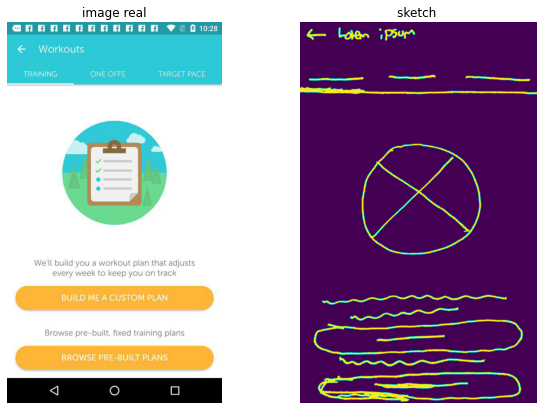

In [12]:
fig = plt.figure(figsize=(10, 7))
# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(im)
plt.axis('off')
plt.title("image real")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(sk)
plt.axis('off')
plt.title("sketch ")